In [13]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models



# Define Autoencoder architecture
def create_autoencoder(input_dim, encoding_dim):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    model.add(layers.Dense(encoding_dim, activation='relu'))
    model.add(layers.Dense(input_dim, activation='sigmoid'))
    return model





# Path to your dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/newDataSet"

# Get a list of folder names (assuming they are named 1, 2, 3, ..., 120)
folder_names = [str(i) for i in range(1, 2)]

# List to store clustering results for each folder
all_folder_clusters = []
reduced_images_list = []  # List to store reduced images for the first 6 iterations

cntr = 0

for folder_name in folder_names:
    # Construct the path to the current folder
    folder_path = os.path.join(dataset_path, folder_name)

    # Get a list of image file paths in the current folder
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.png')]

    # Check if there are at least 5 images in the folder
    if len(image_paths) <= 5:
        print(f"Skipping folder {folder_name} as it has less than 5 images.")
        continue
    cntr = cntr + 1

    # Load and preprocess images
    images = [np.array(Image.open(path).convert('L')) for path in image_paths]

    # Flatten the images
    flattened_images = [image.flatten() for image in images]

    # Standardize the data
    scaler = StandardScaler()
    standardized_images = scaler.fit_transform(flattened_images)

    # Check the number of features after standardization
    num_features = standardized_images.shape[0]


    # Apply PCA for dimensionality reduction
    n_components = min(8, num_features)
    pca = PCA(n_components)
    reduced_images_pca = pca.fit_transform(standardized_images)
    # Create Autoencoder model outside the loop
    autoencoder = create_autoencoder(input_dim=n_components, encoding_dim=2)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder_encoder = models.Sequential(autoencoder.layers[:2])
    # Use Autoencoder for additional feature extraction
    autoencoder.fit(reduced_images_pca, reduced_images_pca, epochs=10, batch_size=32, shuffle=True, verbose=0)

    # Extract features using the encoder part of the Autoencoder
    extracted_features = autoencoder_encoder.predict(reduced_images_pca)

    # Save reduced images for the first 6 iterations
    if cntr <= 6:
        reduced_images_list.append(extracted_features)
    else:
        break

    # Use K-Means clustering on the extracted features
    kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
    clusters = kmeans.fit_predict(extracted_features)

    # Append the clustering results for the current folder to the list
    all_folder_clusters.append(clusters)


2/2 [==============================] - 0s 4ms/step


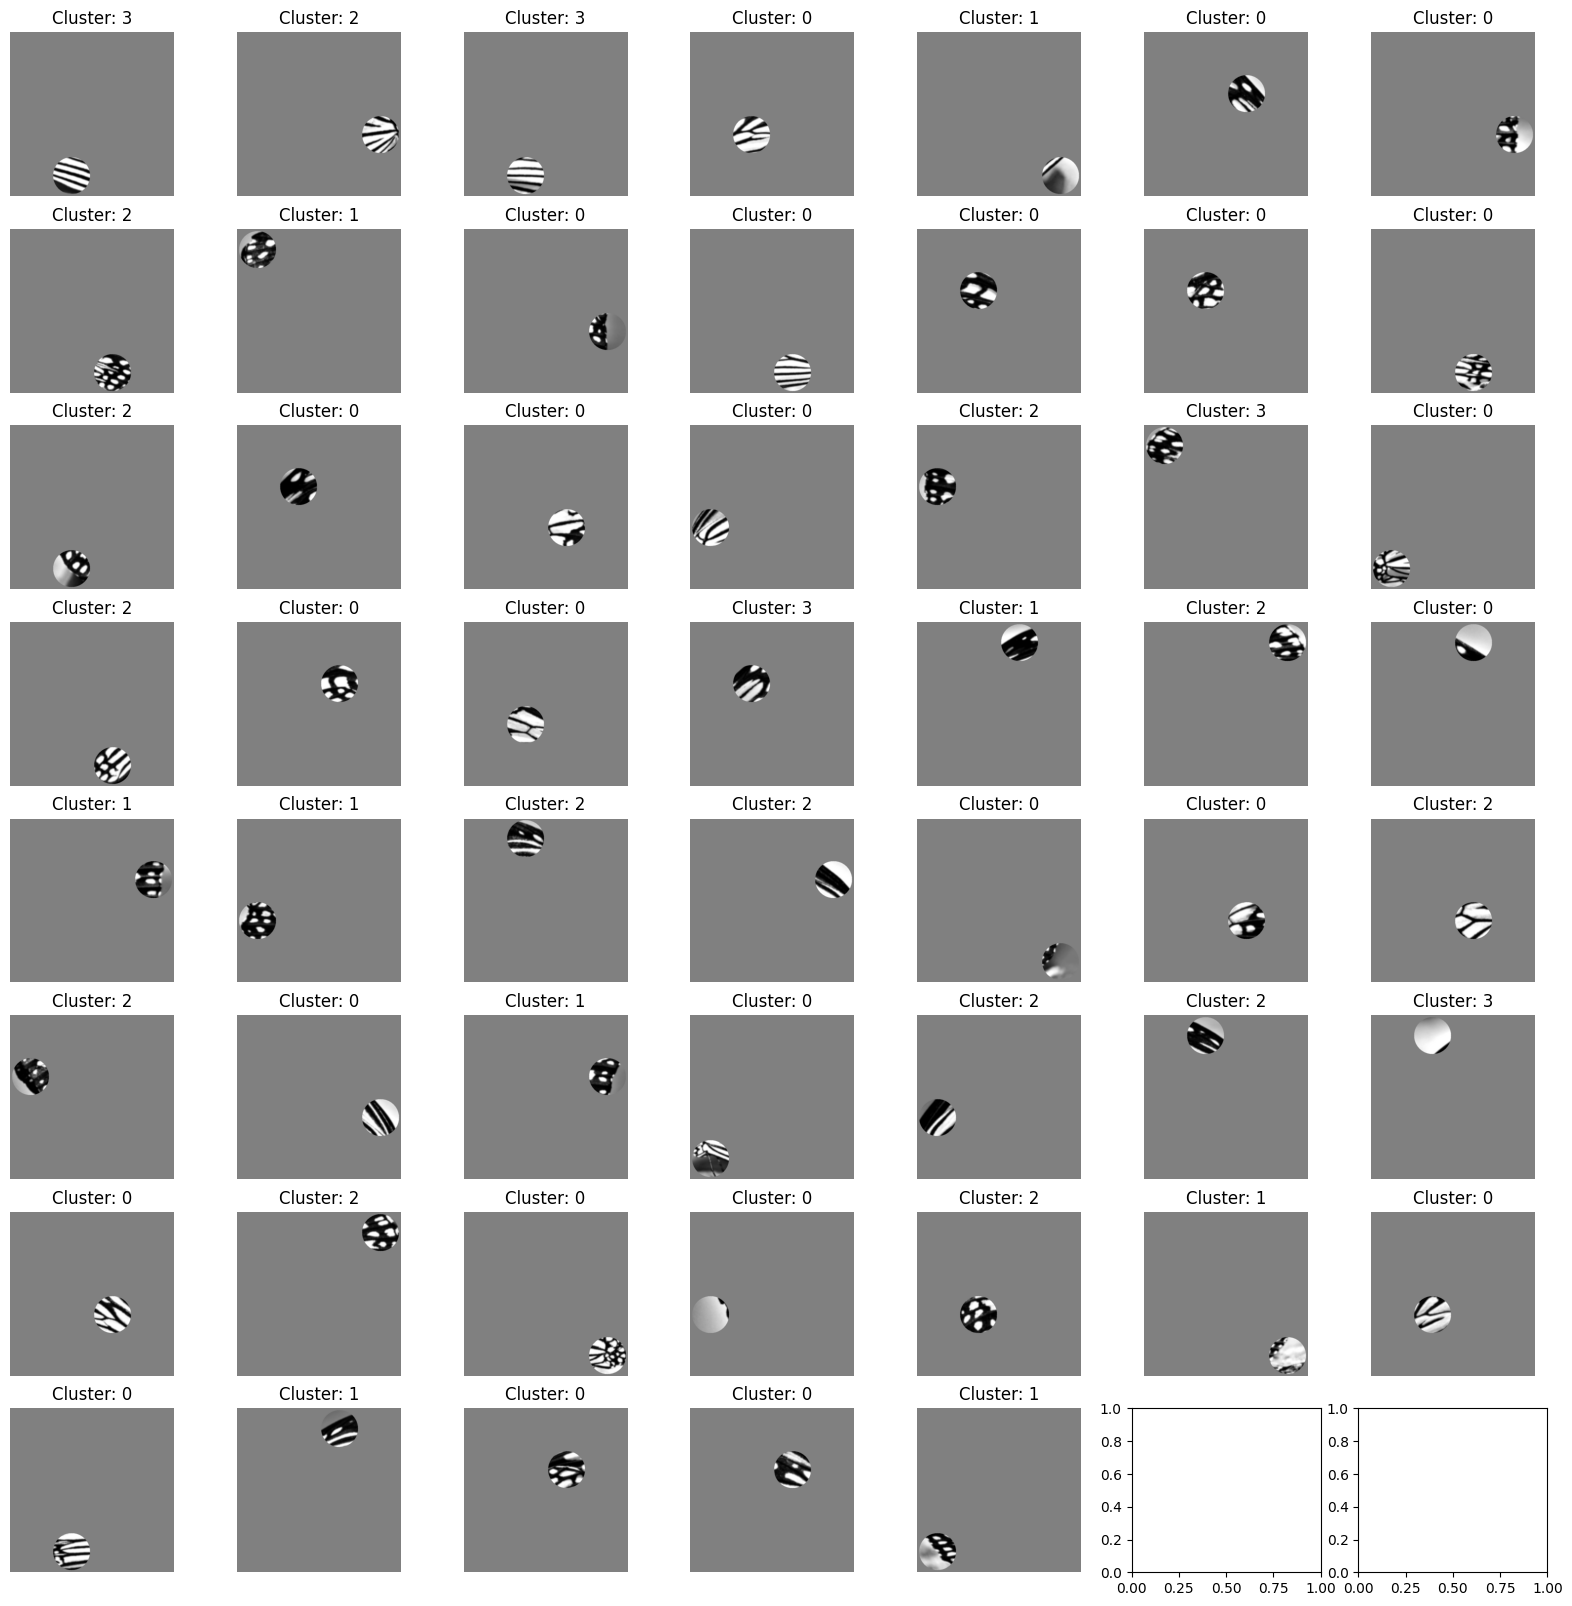

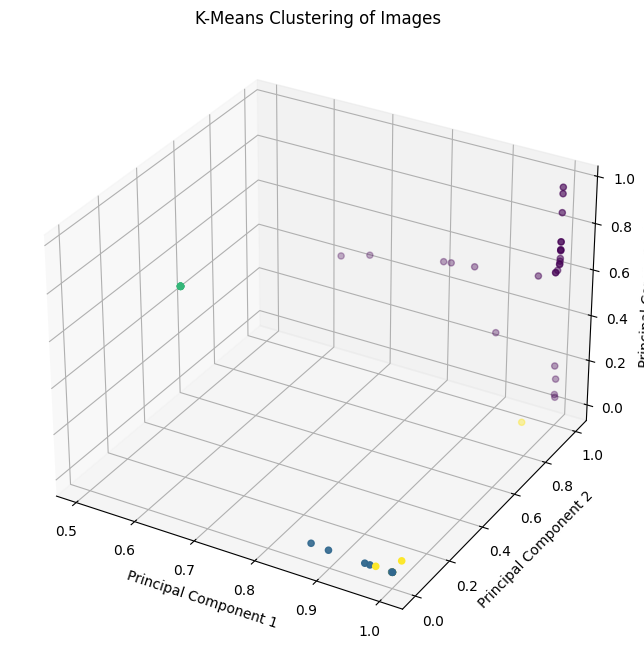

In [14]:
fig, axes = plt.subplots(8, 7, figsize=(20, 20))

clusters = all_folder_clusters[0]
image_folder = "/content/drive/MyDrive/Colab Notebooks/newDataSet/1"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
axes = axes.flatten()

# Show each image in their respective clusters
for i, path in enumerate(image_paths):
    img = Image.open(path)
    cluster_label = clusters[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()
reduced_images = reduced_images_list[0]
# Visualize the results in 3D
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

ax_3d.scatter(reduced_images[:, 0], reduced_images[:, 1], reduced_images[:, 2], c=clusters, cmap='viridis')
ax_3d.set_title('K-Means Clustering of Images')
ax_3d.set_xlabel('Principal Component 1')
ax_3d.set_ylabel('Principal Component 2')
ax_3d.set_zlabel('Principal Component 3')

plt.show()

In [ ]:
"""
import os
import shutil

# Define the source and destination directories
src_dir = '/content/drive/MyDrive/Colab Notebooks/newDataSet2'
dest_dir = '/content/drive/MyDrive/Colab Notebooks/newDataSet2-2'  # Update this to your destination folder path

# Create the destination directory if it doesn't exist
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Process each folder in the source directory
for folder in os.listdir(src_dir):
    folder_path = os.path.join(src_dir, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            # Create a unique new filename
            new_filename = f"{folder}_{filename}"
            old_file_path = os.path.join(folder_path, filename)
            new_file_path = os.path.join(dest_dir, new_filename)

            # Move the file
            shutil.move(old_file_path, new_file_path)

print("Images have been successfully moved.")
"""

In [16]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models



# Define Autoencoder architecture
def create_autoencoder(input_dim, encoding_dim):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    model.add(layers.Dense(encoding_dim, activation='relu'))
    model.add(layers.Dense(input_dim, activation='sigmoid'))
    return model





# Path to your dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/newDataSet2-2'

# Get a list of folder names (assuming they are named 1, 2, 3, ..., 120)
folder_names = [str(i) for i in range(1, 2)]

# List to store clustering results for each folder
all_folder_clusters = []
reduced_images_list = []  # List to store reduced images for the first 6 iterations

cntr = 0

for folder_name in folder_names:
    # Construct the path to the current folder
    folder_path = os.path.join(dataset_path, folder_name)

    # Get a list of image file paths in the current folder
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.png')]

    # Check if there are at least 5 images in the folder
    if len(image_paths) <= 5:
        print(f"Skipping folder {folder_name} as it has less than 5 images.")
        continue
    cntr = cntr + 1

    # Load and preprocess images
    images = [np.array(Image.open(path).convert('L')) for path in image_paths]

    # Flatten the images
    flattened_images = [image.flatten() for image in images]

    # Standardize the data
    scaler = StandardScaler()
    standardized_images = scaler.fit_transform(flattened_images)

    # Check the number of features after standardization
    num_features = standardized_images.shape[0]


    # Apply PCA for dimensionality reduction
    n_components = min(8, num_features)
    pca = PCA(n_components)
    reduced_images_pca = pca.fit_transform(standardized_images)
    # Create Autoencoder model outside the loop
    autoencoder = create_autoencoder(input_dim=n_components, encoding_dim=2)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder_encoder = models.Sequential(autoencoder.layers[:2])
    # Use Autoencoder for additional feature extraction
    autoencoder.fit(reduced_images_pca, reduced_images_pca, epochs=10, batch_size=32, shuffle=True, verbose=0)

    # Extract features using the encoder part of the Autoencoder
    extracted_features = autoencoder_encoder.predict(reduced_images_pca)

    # Save reduced images for the first 6 iterations
    if cntr <= 6:
        reduced_images_list.append(extracted_features)
    else:
        break

    # Use K-Means clustering on the extracted features
    kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
    clusters = kmeans.fit_predict(extracted_features)

    # Append the clustering results for the current folder to the list
    all_folder_clusters.append(clusters)


3/3 [==============================] - 0s 3ms/step


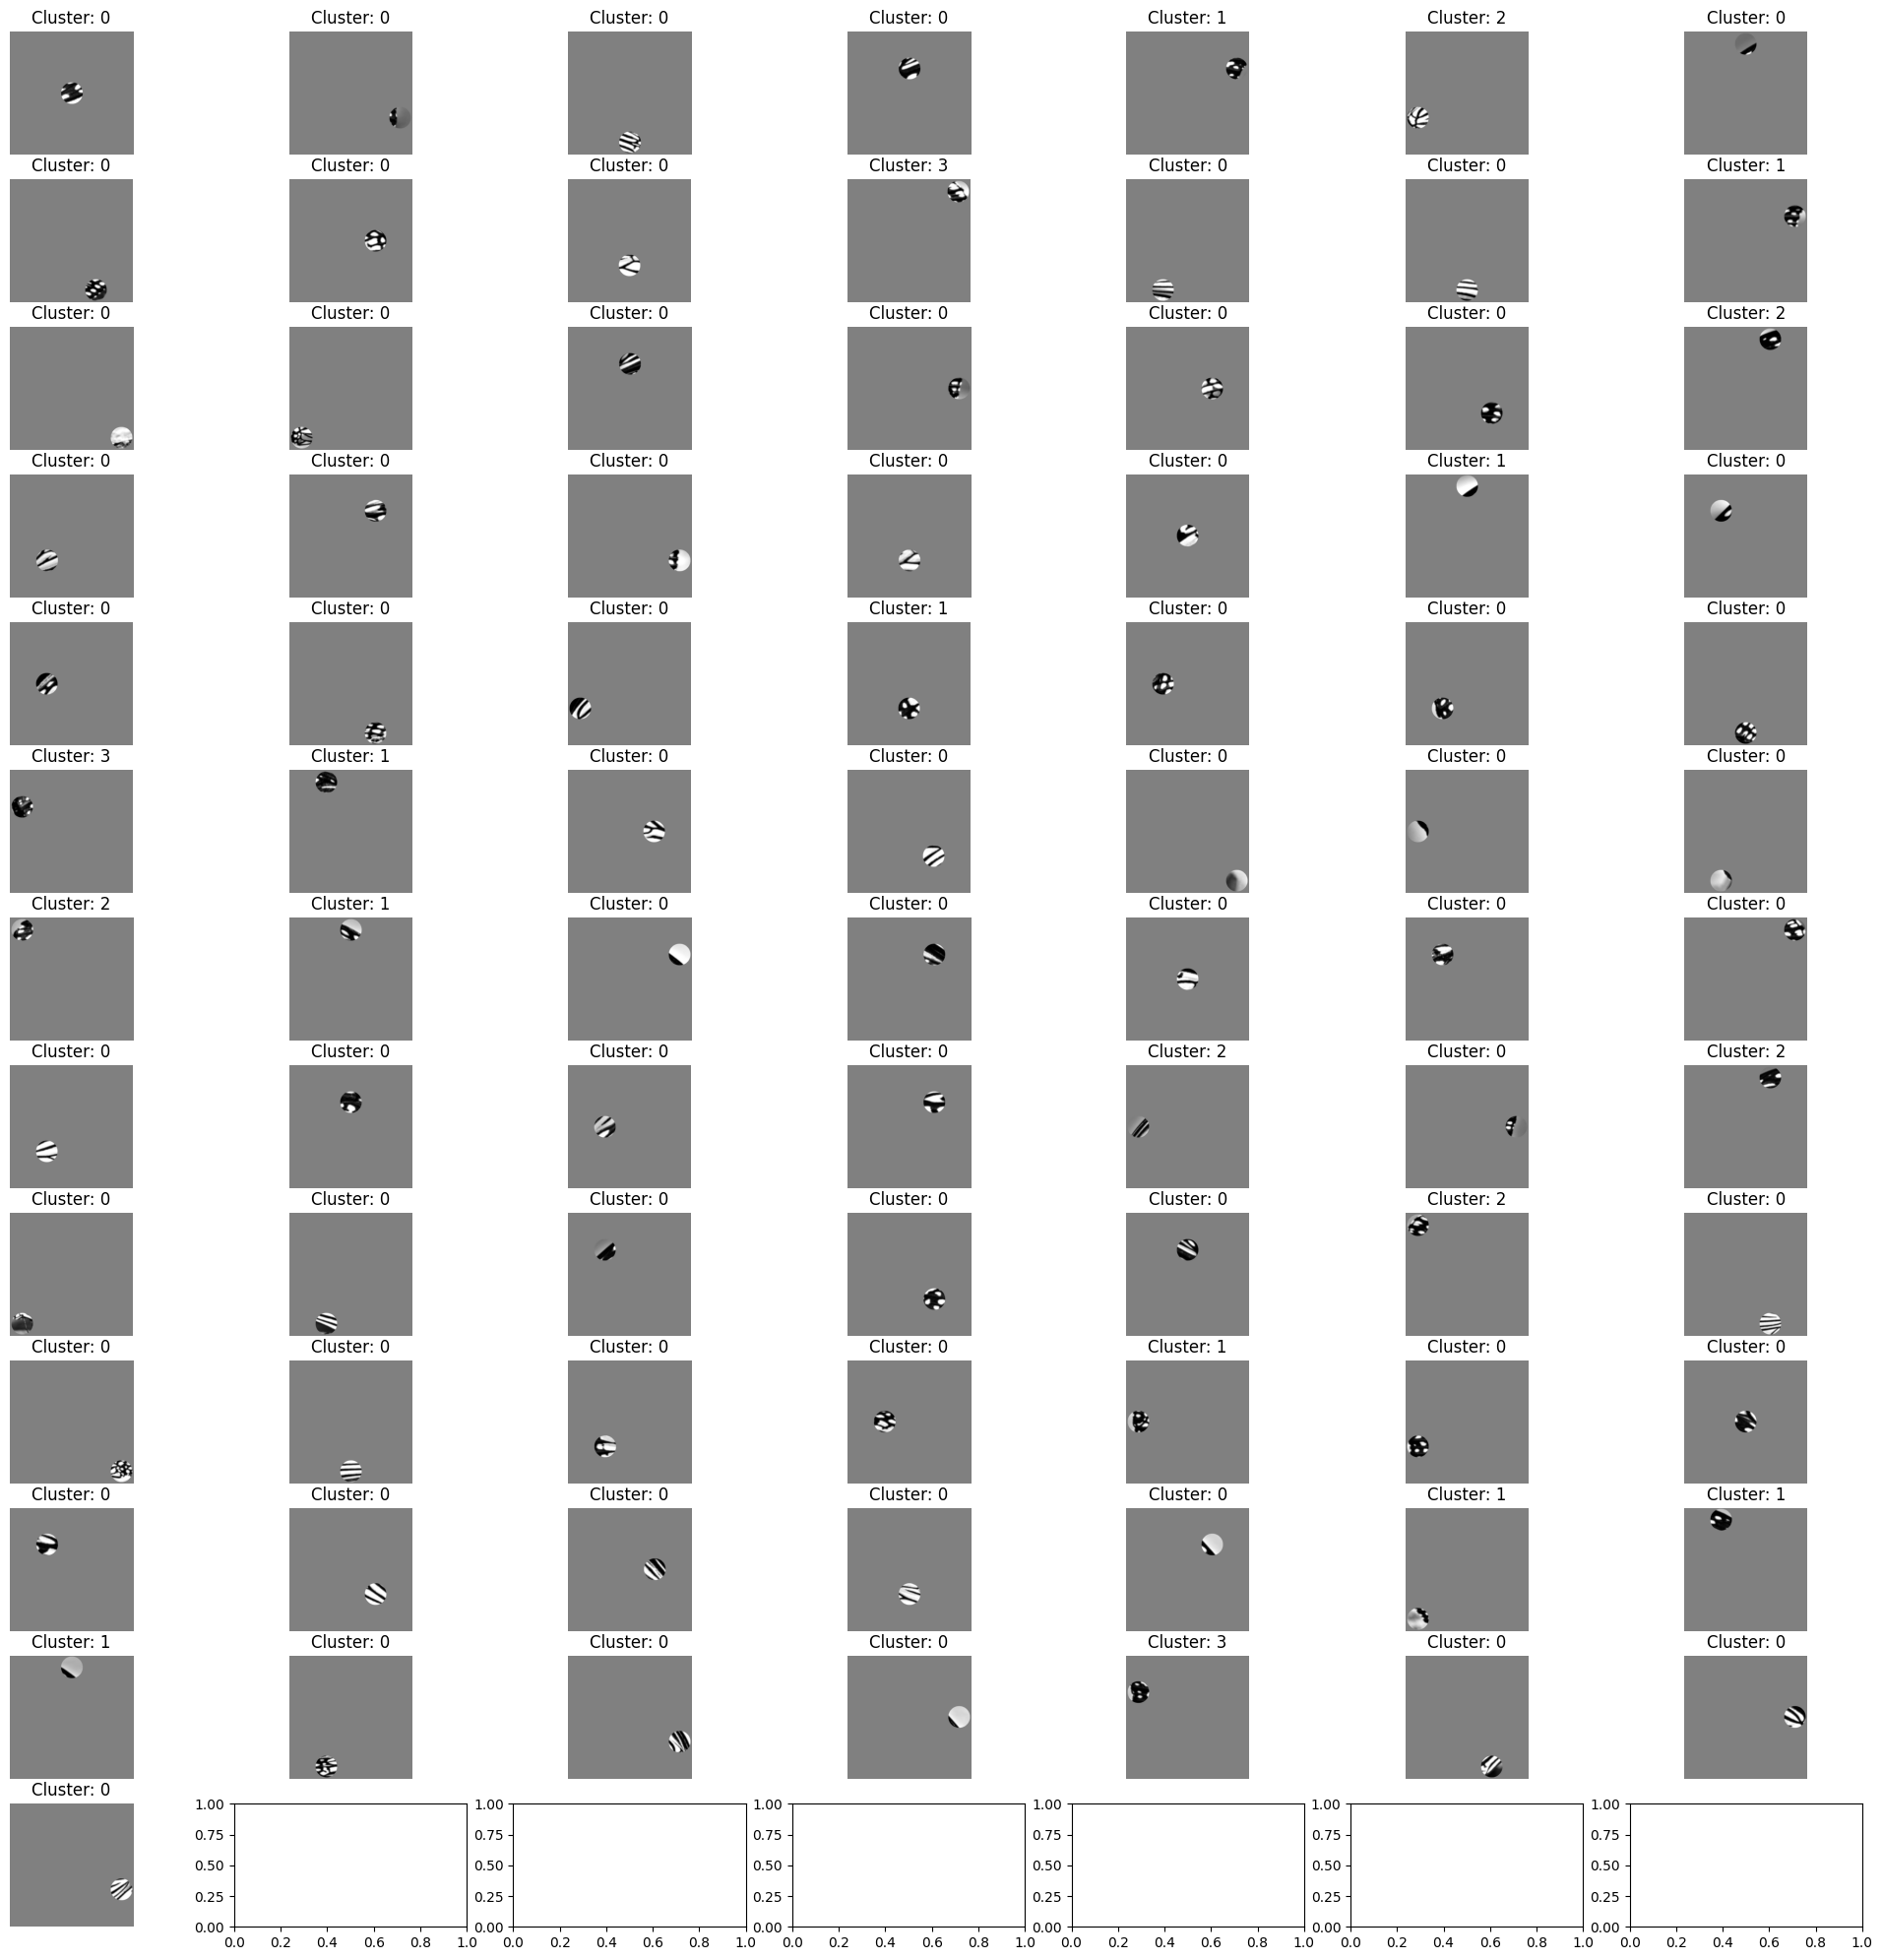

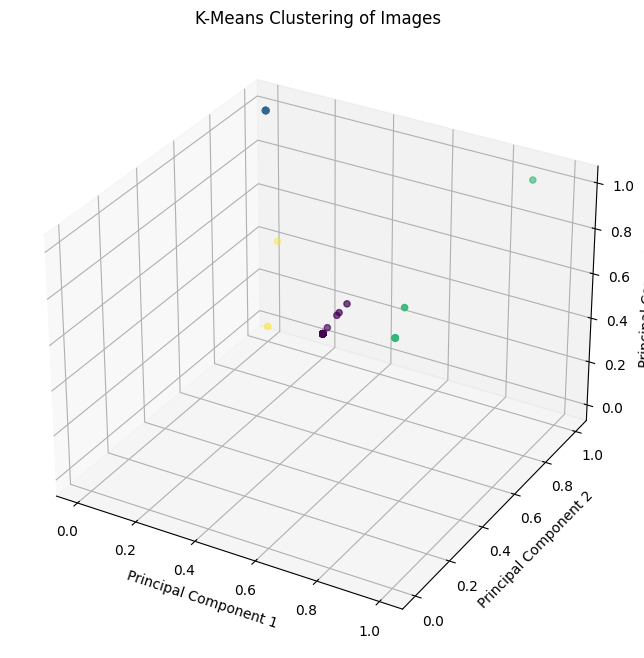

In [18]:
fig, axes = plt.subplots(13, 7, figsize=(25, 25))

clusters = all_folder_clusters[0]
image_folder = "/content/drive/MyDrive/Colab Notebooks/newDataSet2-2/1"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
axes = axes.flatten()

# Show each image in their respective clusters
for i, path in enumerate(image_paths):
    img = Image.open(path)
    cluster_label = clusters[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()
reduced_images = reduced_images_list[0]
# Visualize the results in 3D
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

ax_3d.scatter(reduced_images[:, 0], reduced_images[:, 1], reduced_images[:, 2], c=clusters, cmap='viridis')
ax_3d.set_title('K-Means Clustering of Images')
ax_3d.set_xlabel('Principal Component 1')
ax_3d.set_ylabel('Principal Component 2')
ax_3d.set_zlabel('Principal Component 3')

plt.show()

In [19]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy import stats



# Define Autoencoder architecture
def create_autoencoder(input_dim, encoding_dim):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    model.add(layers.Dense(encoding_dim, activation='relu'))
    model.add(layers.Dense(input_dim, activation='sigmoid'))
    return model





# Path to your dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/newDataSet2-2'

# Get a list of folder names (assuming they are named 1, 2, 3, ..., 120)
folder_names = [str(i) for i in range(1, 2)]

# List to store clustering results for each folder
all_folder_clusters = []
reduced_images_list = []  # List to store reduced images for the first 6 iterations

cntr = 0

for folder_name in folder_names:
    # Construct the path to the current folder
    folder_path = os.path.join(dataset_path, folder_name)

    # Get a list of image file paths in the current folder
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.png')]

    # Check if there are at least 5 images in the folder
    if len(image_paths) <= 5:
        print(f"Skipping folder {folder_name} as it has less than 5 images.")
        continue
    cntr = cntr + 1

    # Load and preprocess images
    images = [np.array(Image.open(path).convert('L')) for path in image_paths]

    # Flatten the images
    flattened_images = [image.flatten() for image in images]

    # Standardize the data
    scaler = StandardScaler()
    standardized_images = scaler.fit_transform(flattened_images)

    # Check the number of features after standardization
    num_features = standardized_images.shape[0]


    # Apply PCA for dimensionality reduction
    n_components = min(8, num_features)
    pca = PCA(n_components)
    reduced_images_pca = pca.fit_transform(standardized_images)
    # Create Autoencoder model outside the loop
    autoencoder = create_autoencoder(input_dim=n_components, encoding_dim=2)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder_encoder = models.Sequential(autoencoder.layers[:2])
    # Use Autoencoder for additional feature extraction
    autoencoder.fit(reduced_images_pca, reduced_images_pca, epochs=10, batch_size=32, shuffle=True, verbose=0)

    # Extract features using the encoder part of the Autoencoder
    extracted_features = autoencoder_encoder.predict(reduced_images_pca)

    # Save reduced images for the first 6 iterations
    if cntr <= 6:
        reduced_images_list.append(extracted_features)
    else:
        break

    # Use K-Means clustering on the extracted features
    # First, identify outliers using Z-score
    z_scores = np.abs(stats.zscore(extracted_features))
    outlier_mask = (z_scores > 3).any(axis=1)
    outliers = np.where(outlier_mask)[0]

    # Label outliers with 7
    clusters = np.full(extracted_features.shape[0], 7)
    # Perform K-Means clustering on non-outlier data
    non_outlier_data = extracted_features[~outlier_mask]
    if non_outlier_data.shape[0] > 0:
        kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
        non_outlier_clusters = kmeans.fit_predict(non_outlier_data)
        clusters[~outlier_mask] = non_outlier_clusters

    # Append the clustering results for the current folder to the list
    all_folder_clusters.append(clusters)


3/3 [==============================] - 0s 3ms/step


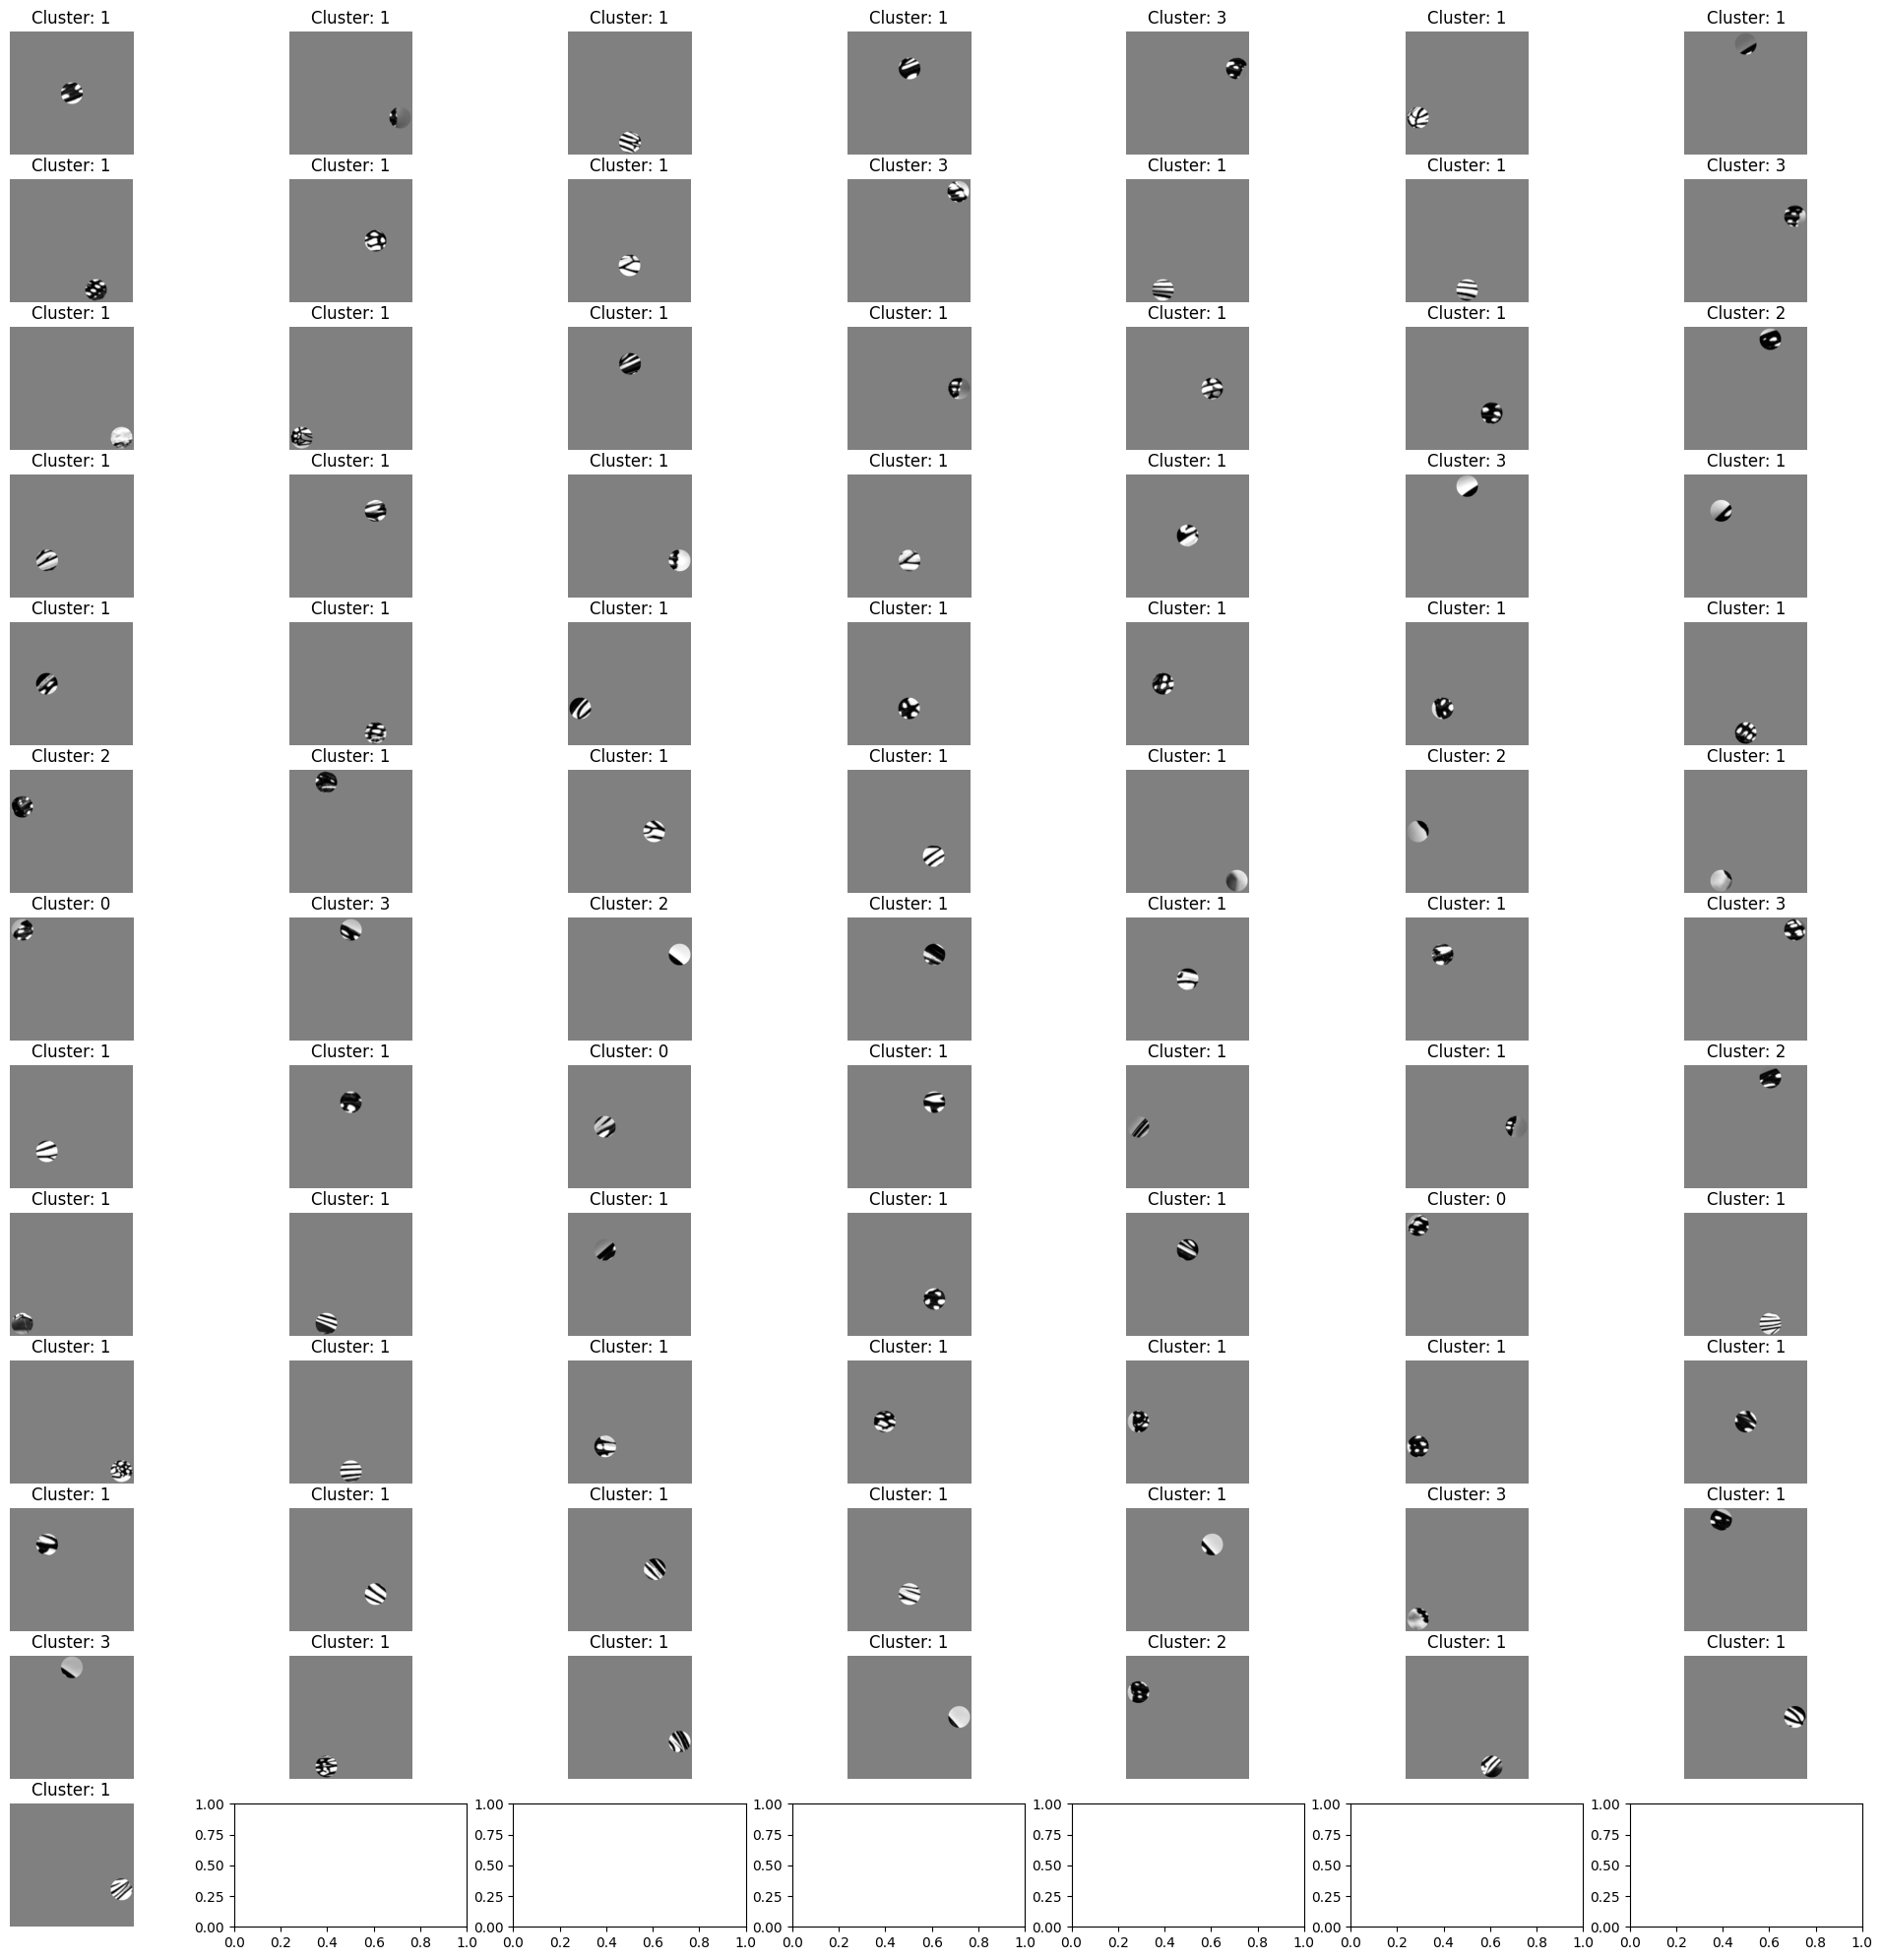

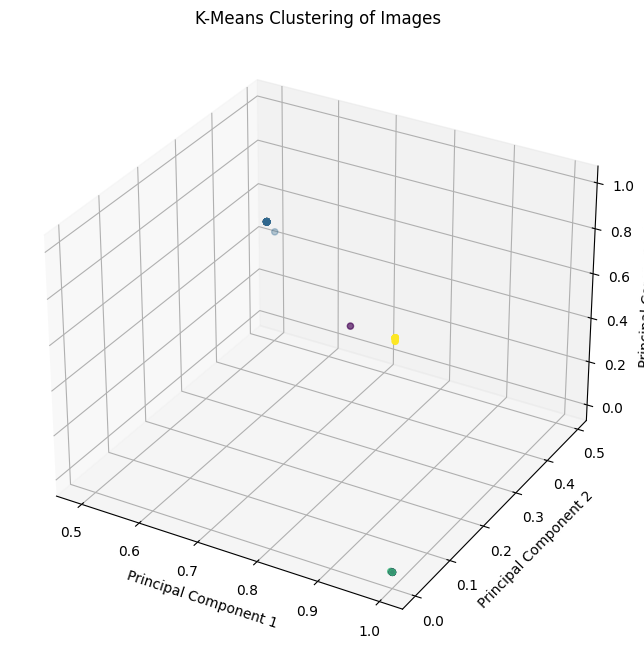

In [20]:
fig, axes = plt.subplots(13, 7, figsize=(25, 25))

clusters = all_folder_clusters[0]
image_folder = "/content/drive/MyDrive/Colab Notebooks/newDataSet2-2/1"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
axes = axes.flatten()

# Show each image in their respective clusters
for i, path in enumerate(image_paths):
    img = Image.open(path)
    cluster_label = clusters[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()
reduced_images = reduced_images_list[0]
# Visualize the results in 3D
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

ax_3d.scatter(reduced_images[:, 0], reduced_images[:, 1], reduced_images[:, 2], c=clusters, cmap='viridis')
ax_3d.set_title('K-Means Clustering of Images')
ax_3d.set_xlabel('Principal Component 1')
ax_3d.set_ylabel('Principal Component 2')
ax_3d.set_zlabel('Principal Component 3')

plt.show()

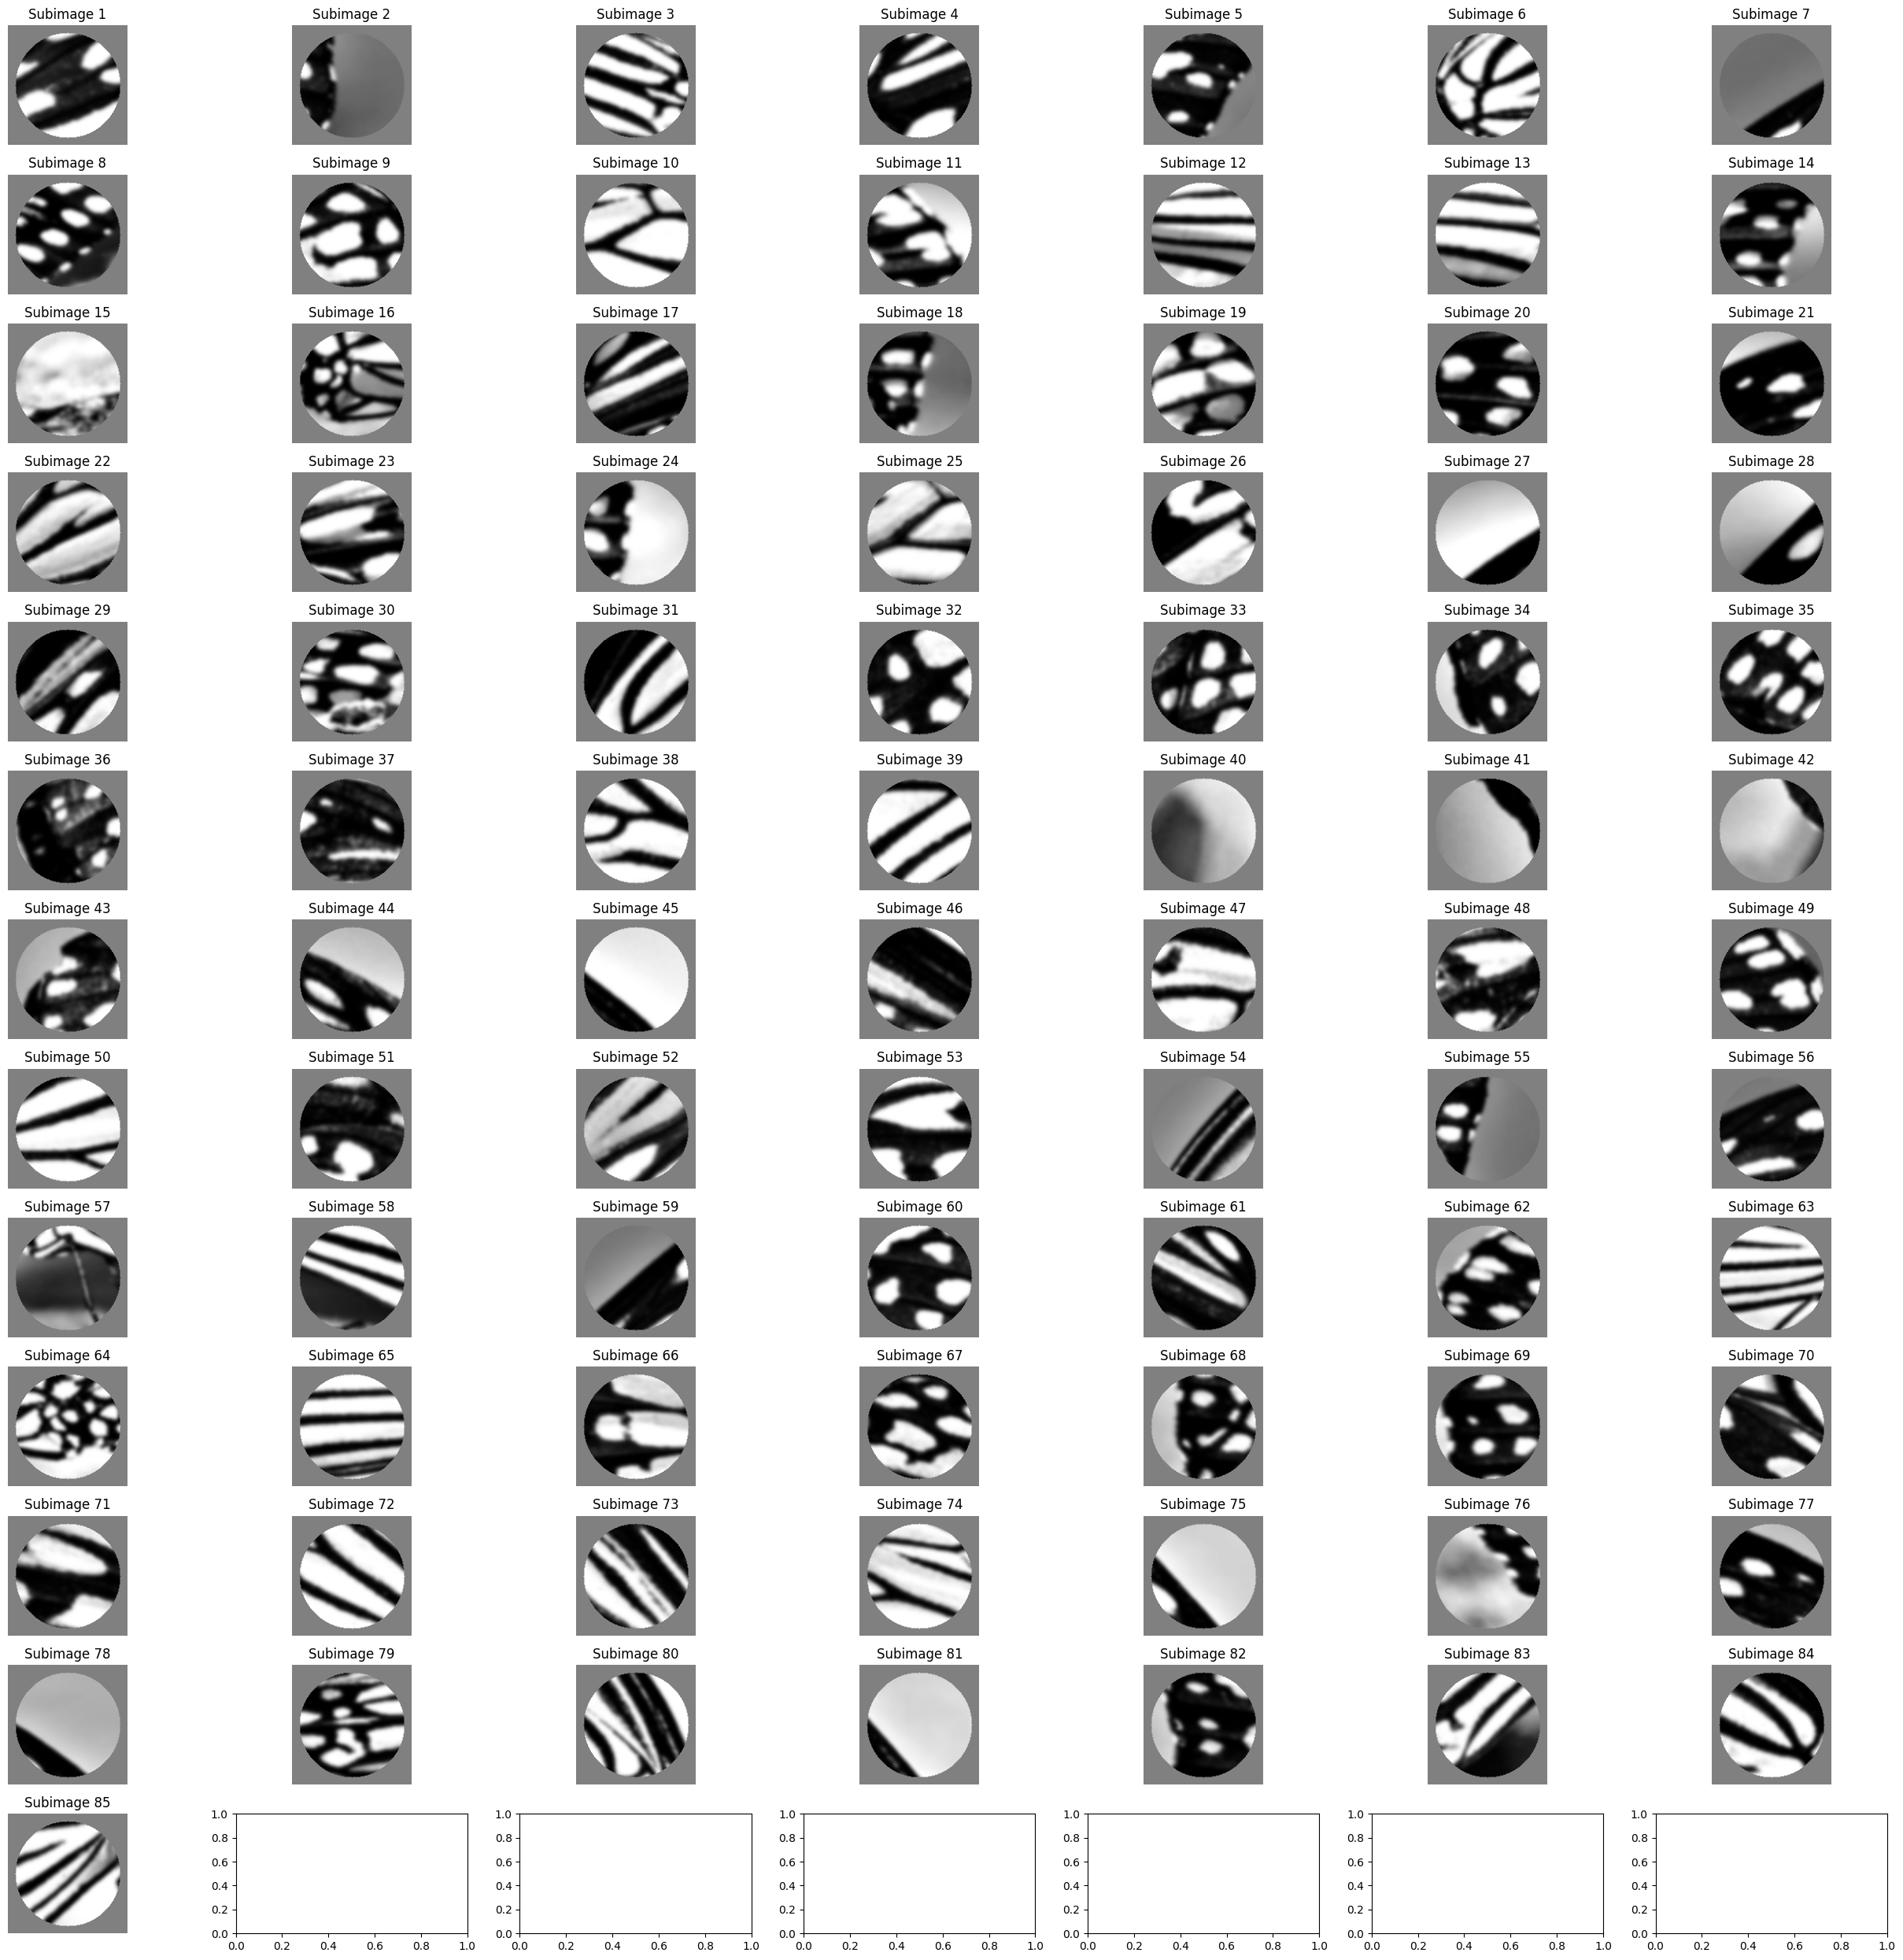

In [23]:
from PIL import Image
import os
import numpy as np

def calculate_entropy(image):
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    probabilities = histogram / sum(histogram)
    entropy = -sum(p * np.log2(p) for p in probabilities if p != 0)
    return entropy

def choose_high_entropy_subimage(subimages):
    entropies = [calculate_entropy(np.array(subimage)) for subimage in subimages]
    max_entropy_index = np.argmax(entropies)
    return subimages[max_entropy_index]

def divide_image(image_path, subimage_size):
    original_image = Image.open(image_path)
    width, height = original_image.size

    num_subimages = 25
    subimages = []

    for i in range(num_subimages):
        # Calculate the corner coordinates for each subimage
        top_left_x = (i % 5) * subimage_size
        top_left_y = (i // 5) * subimage_size
        bottom_right_x = top_left_x + subimage_size
        bottom_right_y = top_left_y + subimage_size

        # Crop the subimage from the original image
        subimage = original_image.crop((top_left_x, top_left_y, bottom_right_x, bottom_right_y))
        subimages.append(subimage)

    return subimages

# Specify the folder containing images
folder_path = "/content/drive/MyDrive/Colab Notebooks/newDataSet2-2/1"

# List to store high entropy subimages for all images
high_entropy_subimages = []

# Loop through all images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)

        # Set the subimage size
        subimage_size = 160

        # Divide the image into subimages
        subimages = divide_image(image_path, subimage_size)

        # Choose the high entropy subimage
        high_entropy_subimage = choose_high_entropy_subimage(subimages)

        # Append the result to the list
        high_entropy_subimages.append(high_entropy_subimage)

# The list high_entropy_subimages now contains the high entropy subimages for all images in the specified folder


import matplotlib.pyplot as plt

# Set the size of the subplots
fig, axes = plt.subplots(13, 7, figsize=(25, 25))

# Plot all high entropy subimages
for i, (subimage, ax) in enumerate(zip(high_entropy_subimages, axes.flatten())):
    ax.imshow(subimage, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Subimage {i+1}')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


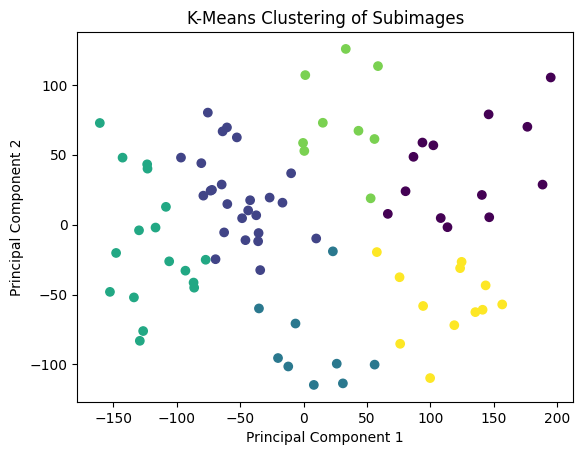

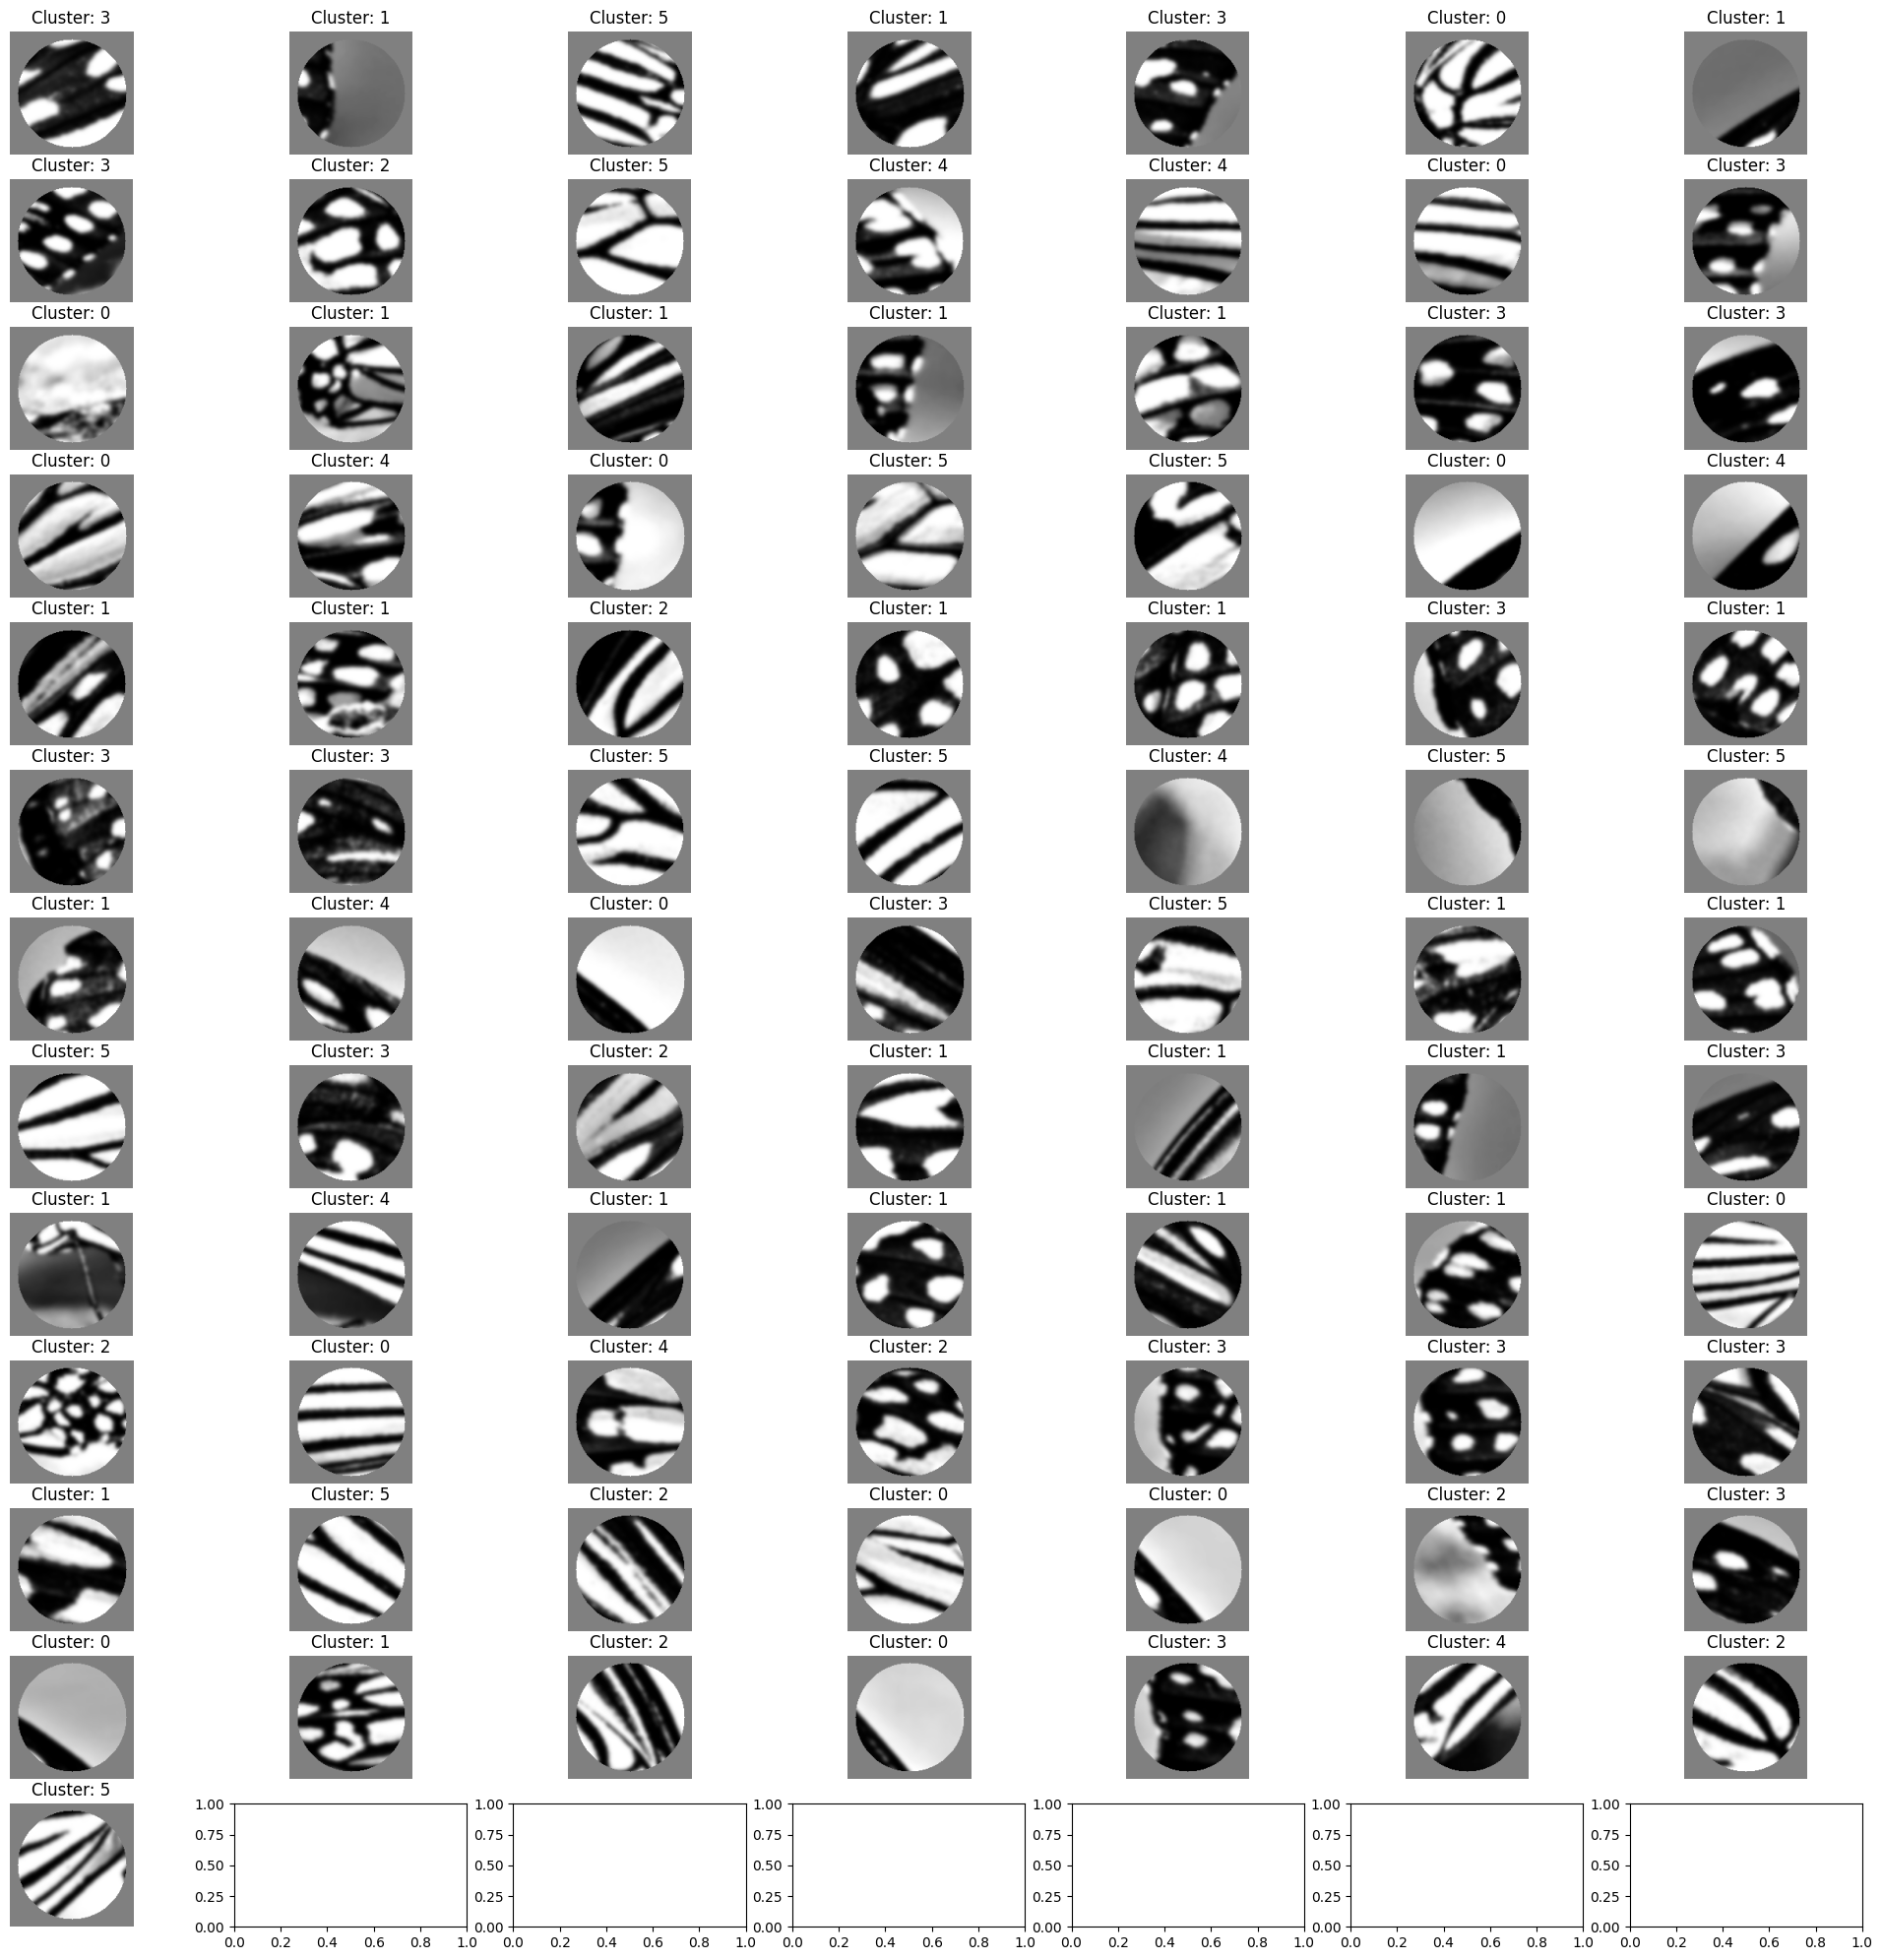

In [24]:
from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess high_entropy_subimages
flattened_subimages = [np.array(subimage).flatten() for subimage in high_entropy_subimages]

# Standardize the data
scaler = StandardScaler()
standardized_subimages = scaler.fit_transform(flattened_subimages)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_subimages = pca.fit_transform(standardized_subimages)

# Use K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(reduced_subimages)

# Visualize the results
plt.scatter(reduced_subimages[:, 0], reduced_subimages[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Subimages')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

fig, axes = plt.subplots(13, 7, figsize=(25, 25))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Show each subimage in their respective clusters
for i, subimage in enumerate(high_entropy_subimages):
    cluster_label = clusters[i]

    axes[i].imshow(subimage, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


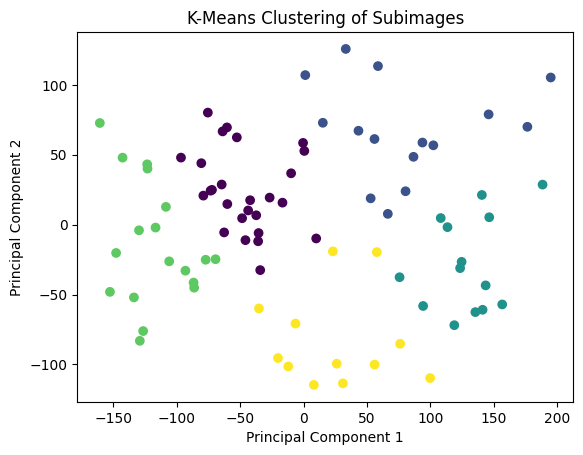

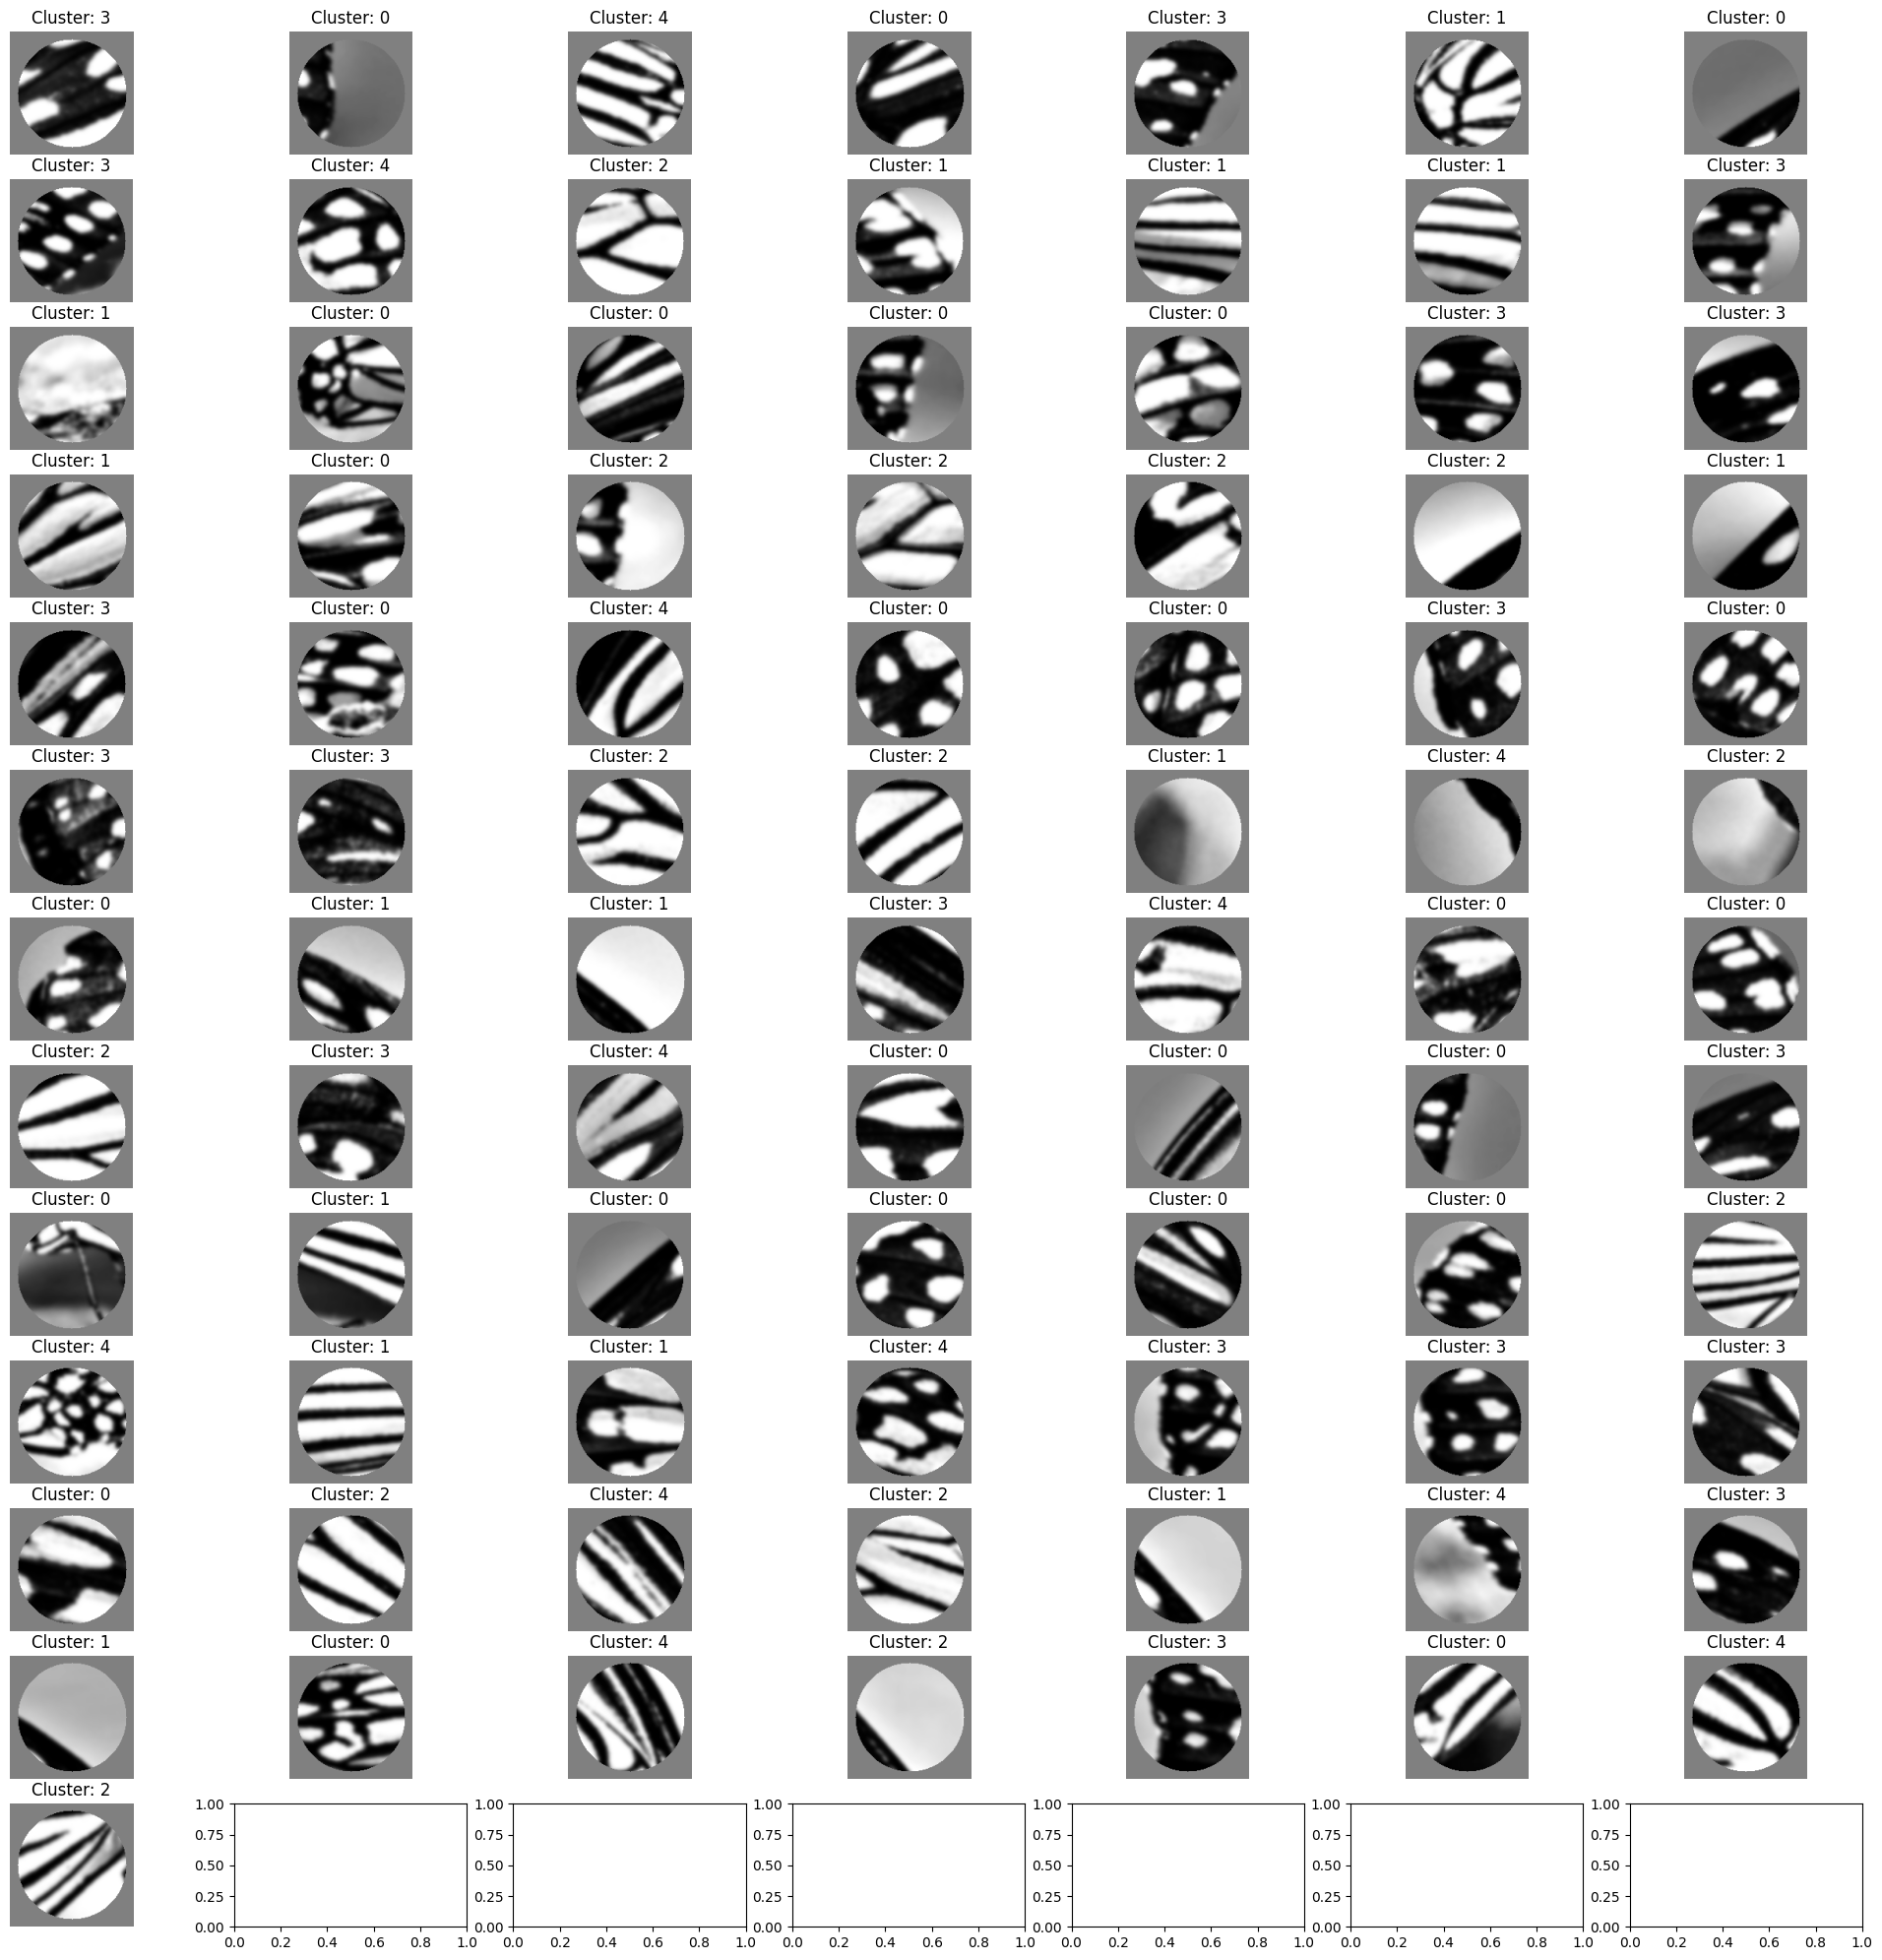

In [25]:
from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess high_entropy_subimages
flattened_subimages = [np.array(subimage).flatten() for subimage in high_entropy_subimages]

# Standardize the data
scaler = StandardScaler()
standardized_subimages = scaler.fit_transform(flattened_subimages)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_subimages = pca.fit_transform(standardized_subimages)

# Use K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(reduced_subimages)

# Visualize the results
plt.scatter(reduced_subimages[:, 0], reduced_subimages[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Subimages')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

fig, axes = plt.subplots(13, 7, figsize=(25, 25))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Show each subimage in their respective clusters
for i, subimage in enumerate(high_entropy_subimages):
    cluster_label = clusters[i]

    axes[i].imshow(subimage, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


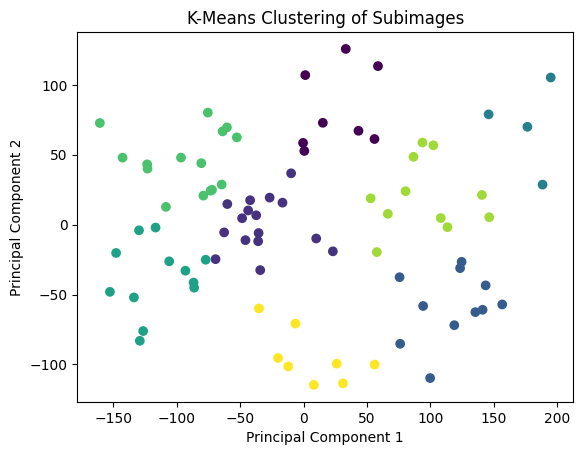

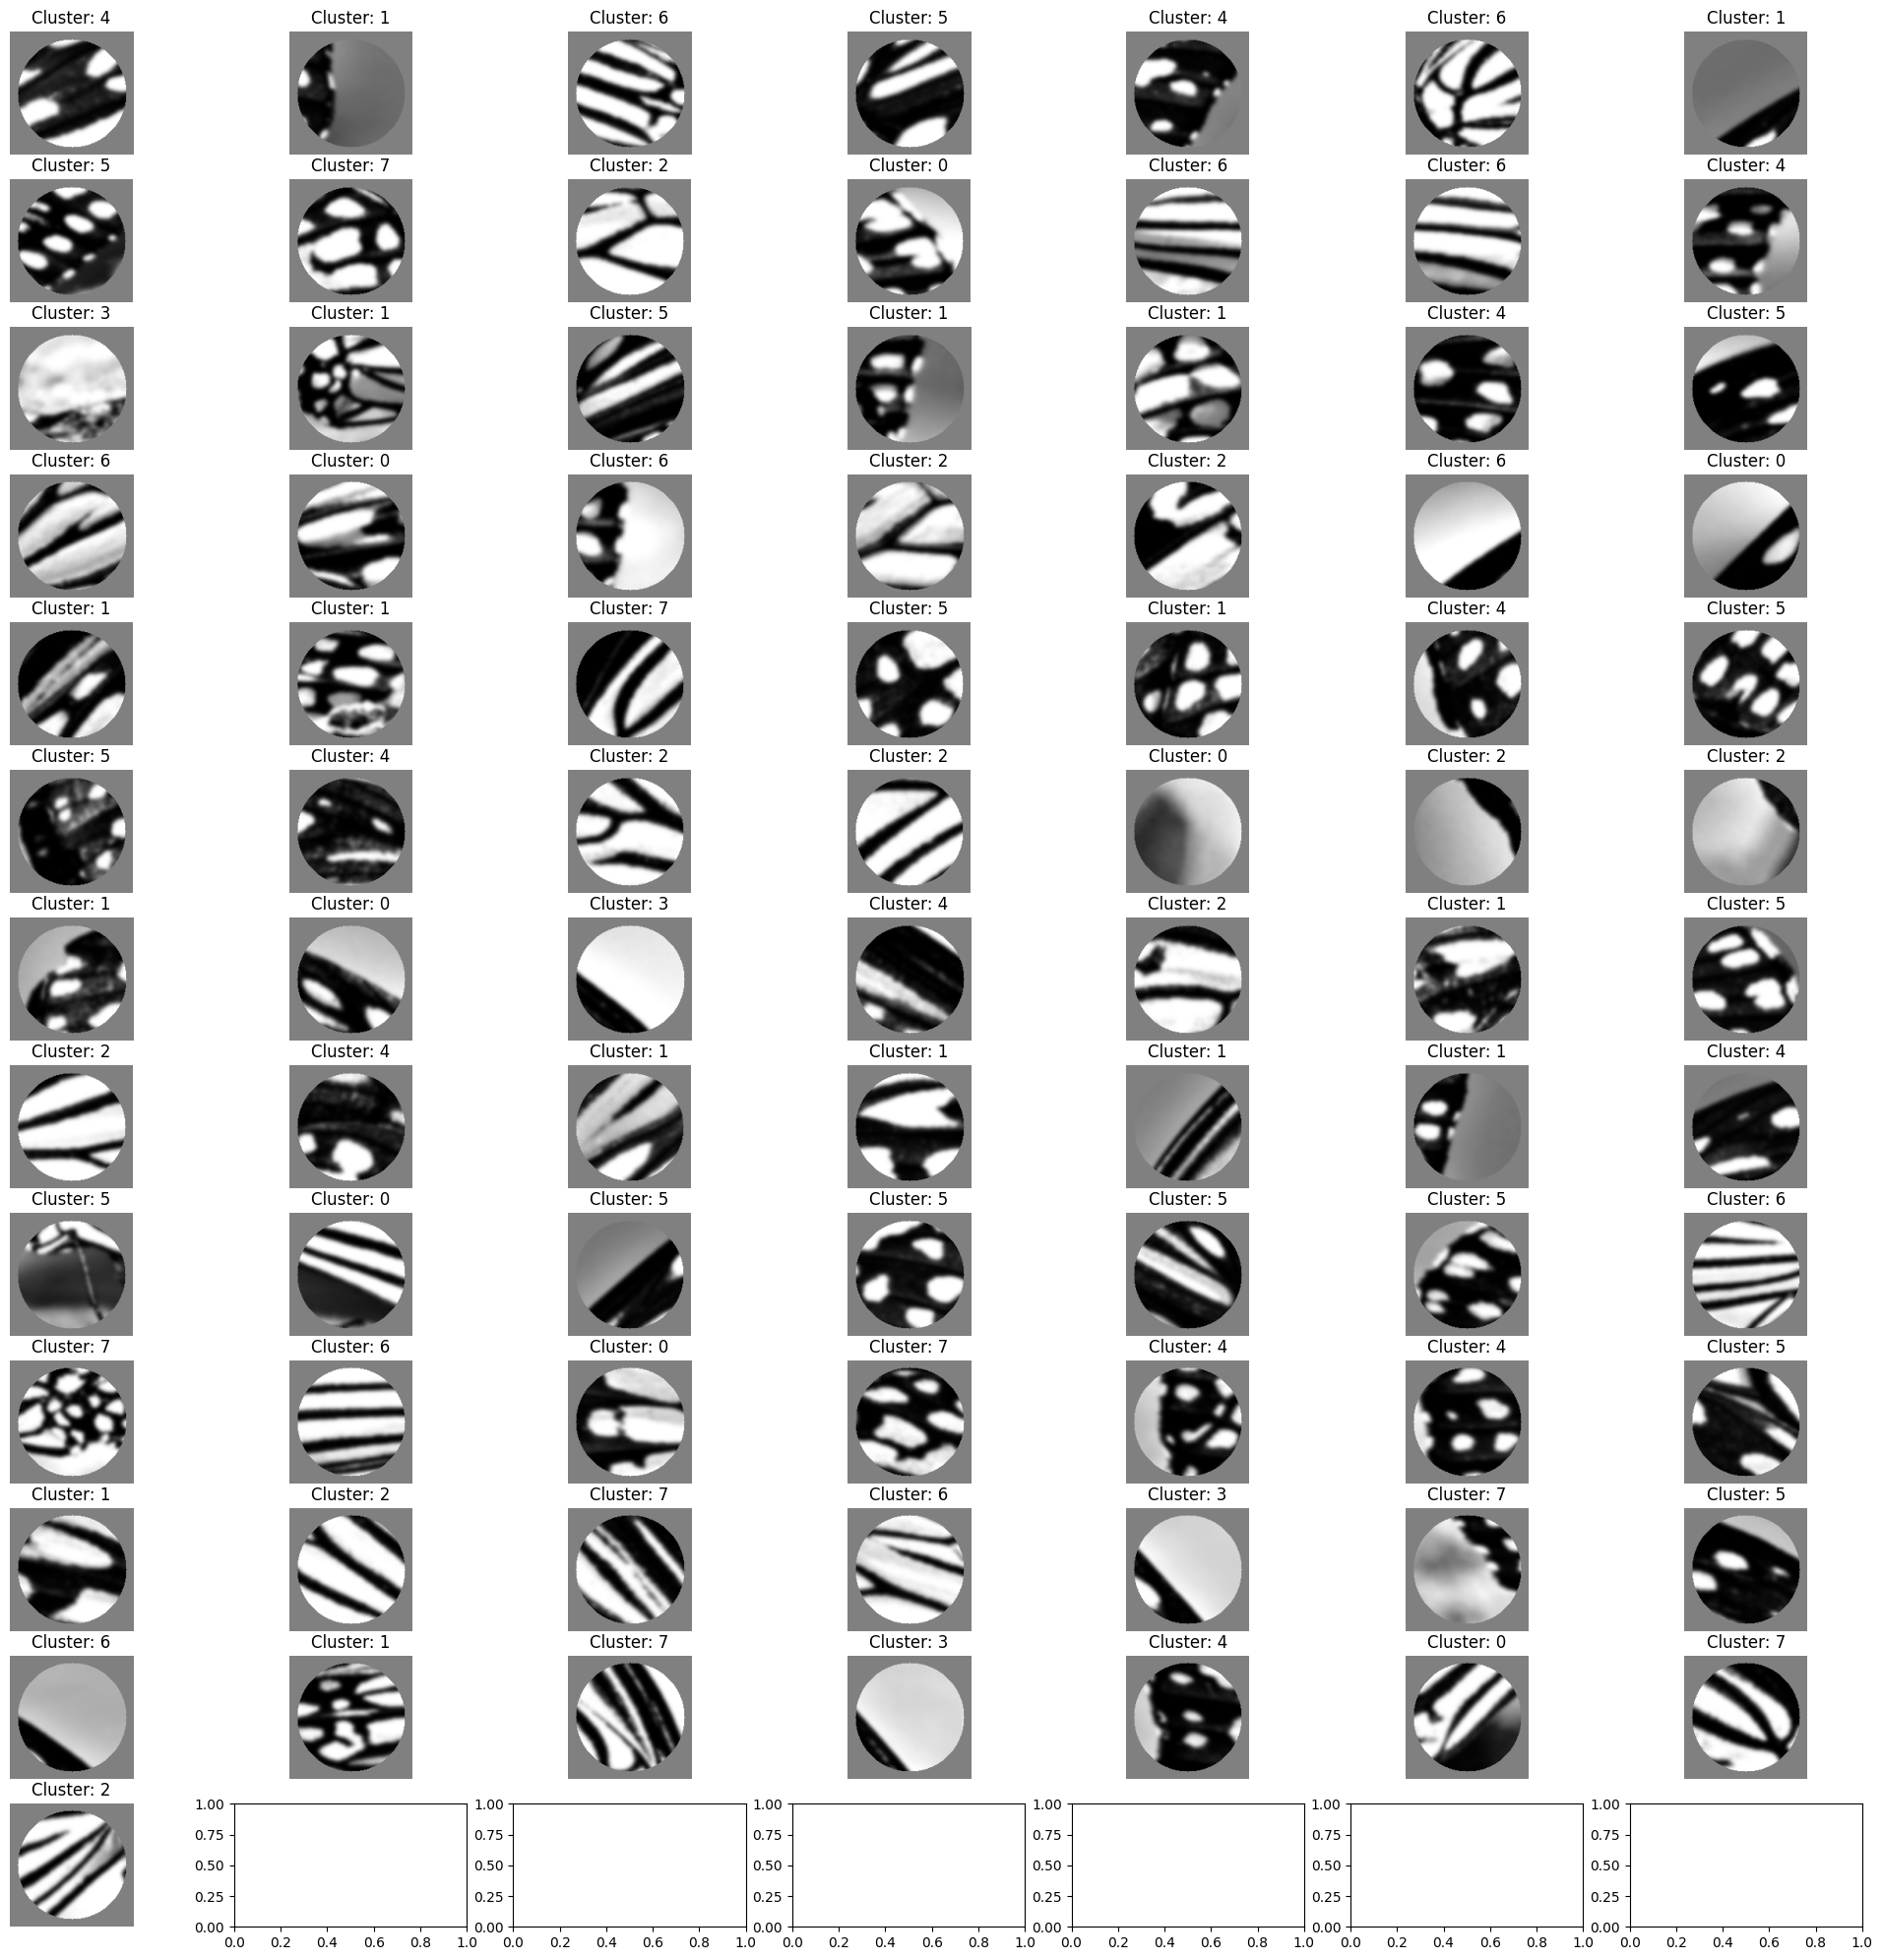

In [26]:
from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess high_entropy_subimages
flattened_subimages = [np.array(subimage).flatten() for subimage in high_entropy_subimages]

# Standardize the data
scaler = StandardScaler()
standardized_subimages = scaler.fit_transform(flattened_subimages)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_subimages = pca.fit_transform(standardized_subimages)

# Use K-Means clustering
kmeans = KMeans(n_clusters=8, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(reduced_subimages)

# Visualize the results
plt.scatter(reduced_subimages[:, 0], reduced_subimages[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Subimages')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

fig, axes = plt.subplots(13, 7, figsize=(25, 25))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Show each subimage in their respective clusters
for i, subimage in enumerate(high_entropy_subimages):
    cluster_label = clusters[i]

    axes[i].imshow(subimage, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()